# Working with Audio in Python

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#list out all the file in a directory
from glob import glob

# main package
import librosa
import librosa.display

# to play the audio
import IPython.display as ipd

# The cycle function returns an iterator that cycles through an iterable indefinitely
from itertools import cycle

# color plot settings
sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## Terms to know for Audio in Digital Form:
### Frequency (Hz)
- frequency describe the differences of wave lengths.
- we interperate frequency has high and low pitches.
- change in pitch is the frequency

### Intensity (db/power)
- intensity describes the amplitude (height) of the wave
- change in intensity is the loudnes

### Sample Rate
- sample rate is specific to how the computer reads in the audio file.
- think of it as the 'resolution' of the audio

## Reading in Audio Files
there are many types of audio files: mp3, wav, m4a, flac, ogg

In [5]:
# make the list of the entire file
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

In [6]:
# Play audio file
ipd.Audio(audio_files[0])

In [12]:
# y is the raw data of the audio file
# sr integer value of the sample rate
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y: (77988,)
sr: 22050


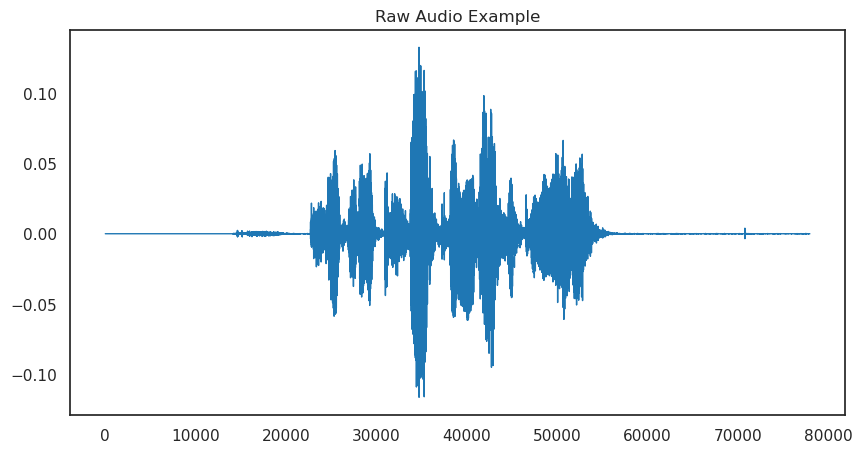

In [16]:
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Example')
plt.show()

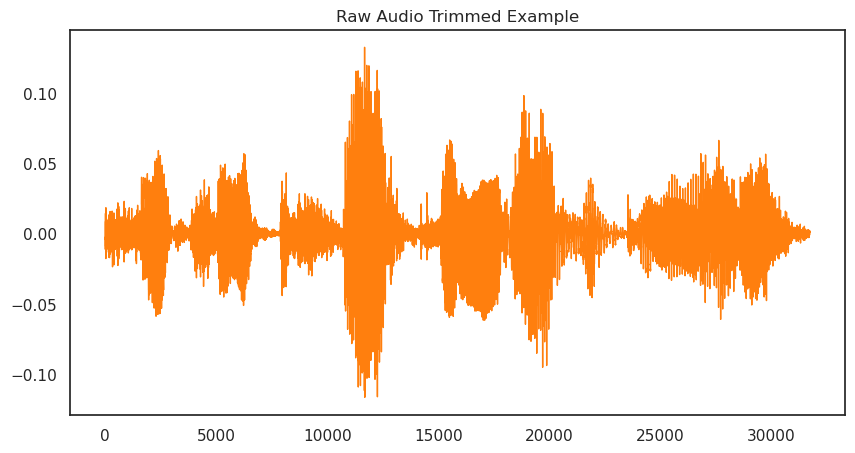

In [24]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                  color=color_pal[1])
plt.show()
# top_db = the maximum level above which the audio will be compressed

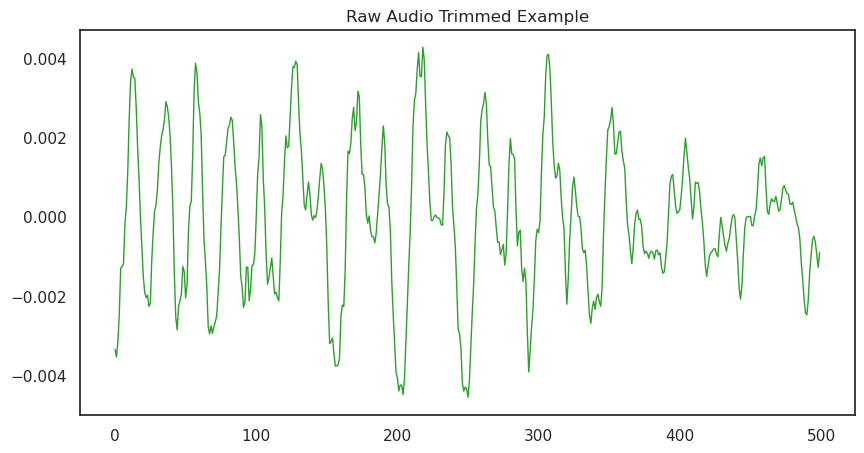

In [29]:
# trimmed it into a good ideal model like this
pd.Series(y[30000:30500]).plot(figsize=(10,5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                  color=color_pal[2])
plt.show()

## Spectogram

In [33]:
# extract out which frequencies are sounding at different parts in the audio file
D = librosa.stft(y)
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape

(1025, 153)

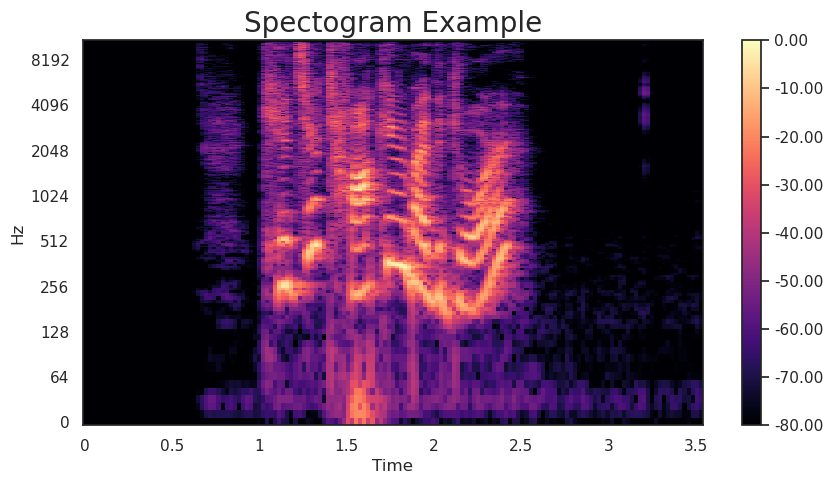

In [39]:
# the right model we can use for machine learning
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(s_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%.2f')

## Mel Spectogram

In [50]:
S = librosa.feature.melspectrogram(y=y,
                               sr=sr,
                               n_mels=256)

s_db_mel = librosa.amplitude_to_db(S, ref=np.max)
# n_mels the number of mel frequency bins used in audio signal processing.
#Mel-frequency cepstral coefficients (MFCCs) are commonly used features for audio
#analysis, and they are derived from the mel scale, which approximates the human
#auditory system's response to different frequencies.

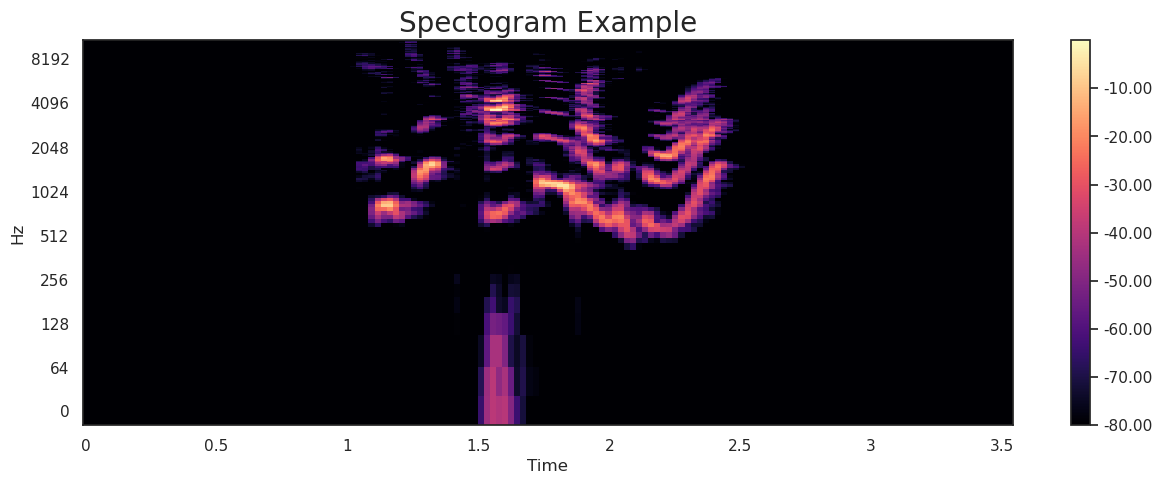

In [51]:
fig, ax = plt.subplots(figsize=(15,5))
# plot the mel spectogram
img = librosa.display.specshow(s_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%.2f')
plt.show()

Now this can be used to train im machine learning model